<a href="https://colab.research.google.com/github/SebasRl07/matematicas_discretas/blob/main/Pto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


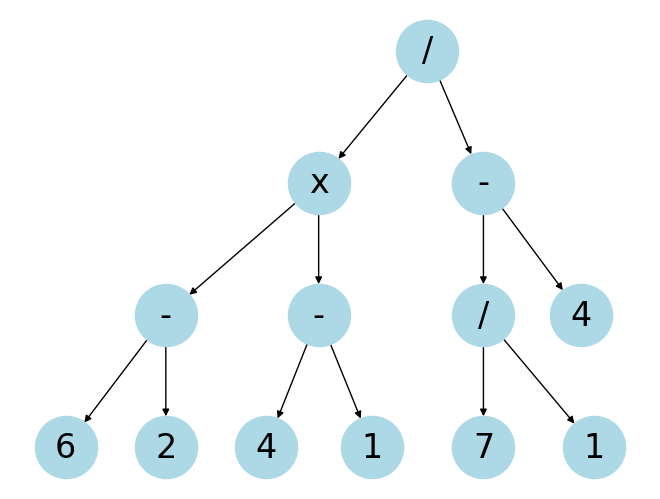

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

# Crear un árbol vacío
G = nx.DiGraph()

# Añadir nodos y aristas para representar la expresión algebraica
# Usamos tuplas para hacer cada nodo único: (valor, id único)
G.add_nodes_from([
    ('/', 0), ('x', 1), ('-', 2), ('-', 3), ('-', 4), ('/', 5), ('4', 6), ('6', 7),
    ('2', 8), ('4', 9), ('1', 10),('7',11),('1',12)
])

# Conectar nodos para formar el árbol
G.add_edges_from([
    (('/', 0), ('x', 1)), (('/', 0), ('-', 2)),
    (('x', 1), ('-', 3)), (('x', 1), ('-', 4)),
    (('-', 3), ('6', 7)), (('-', 3), ('2', 8)),
    (('-', 2), ('/', 5)), (('-', 2), ('4', 6)),
    (('/', 5), ('7', 11)), (('/', 5), ('1', 12)),
    (('-', 4), ('4', 9)), (('-', 4), ('1', 10))
])

# Dibujar el árbol
pos = graphviz_layout(G, prog='dot', args='-Grankdir=TB')
labels = {node: node[0] for node in G.nodes()}
nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=24)
plt.show()

In [4]:
def pre_order_traversal(tree, node):
    result = []
    result.append(node[0])  # Visitar la raíz
    for child in sorted(list(tree.successors(node)), key=lambda x: x[1]):  # Visitar hijos
        result.extend(pre_order_traversal(tree, child))
    return result

# Realizar el recorrido en preorden
root = ('/', 0)
pre_order_result = pre_order_traversal(G, root)
print("Recorrido en preorden:", pre_order_result)

Recorrido en preorden: ['/', 'x', '-', '6', '2', '-', '4', '1', '-', '/', '7', '1', '4']


In [5]:
def post_order_traversal(tree, node):
    result = []
    for child in sorted(list(tree.successors(node)), key=lambda x: x[1]):  # Visitar hijos
        result.extend(post_order_traversal(tree, child))
    result.append(node[0])  # Visitar la raíz
    return result

# Realizar el recorrido en orden posterior
root = ('/', 0)
post_order_result = post_order_traversal(G, root)
print("Recorrido en orden posterior:", post_order_result)

Recorrido en orden posterior: ['6', '2', '-', '4', '1', '-', 'x', '7', '1', '/', '4', '-', '/']


In [6]:
def in_order_traversal(tree, node):
    result = []
    children = sorted(list(tree.successors(node)), key=lambda x: x[1])

    if len(children) > 0:
        result.extend(in_order_traversal(tree, children[0]))  # Visitar el hijo izquierdo si existe

    result.append(node[0])  # Visitar la raíz

    if len(children) > 1:
        result.extend(in_order_traversal(tree, children[1]))  # Visitar el hijo derecho si existe

    return result

# Realizar el recorrido en orden inorden
root = ('/', 0)
in_order_result = in_order_traversal(G, root)
print("Recorrido en orden inorden:", in_order_result)

Recorrido en orden inorden: ['6', '-', '2', 'x', '4', '-', '1', '/', '7', '/', '1', '-', '4']
